# Boltzmann Factor Demo

In [1]:
import numpy as np
import matplotlib.cm as cm

import sys
from LTEpy import lte, atom, plot
from LTEpy.constants import EVOLT

### Make a hydrogen atom

In [2]:
hydrogen = atom.Hydrogen()
print(f"{hydrogen.levels=}")
print(f"{hydrogen.energy/EVOLT=}eV\n{hydrogen.gdegen=}")

hydrogen.levels=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
hydrogen.energy/EVOLT=array([-13.6       ,  -3.4       ,  -1.51111111,  -0.85      ,
        -0.544     ,  -0.37777778,  -0.27755102,  -0.2125    ,
        -0.16790123,  -0.136     ])eV
hydrogen.gdegen=array([  2,   8,  18,  32,  50,  72,  98, 128, 162, 200])


### Calculate Boltzmann Factor of all energy levels

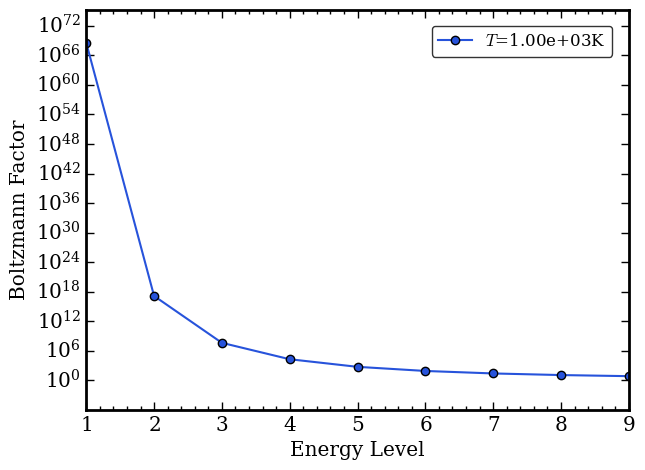

In [3]:
hbf = lte.Boltzmann_Factor(temp=10**3, #Kelvin
                           atom=hydrogen,)
xx = hbf.bfact
fig, hh = hbf.plot_bfact()
fig.axes[0].legend(handles=[hh,])

### Plot for many temperatures

['1.00e+04']
['1.00e+04', '3.16e+04']
['1.00e+04', '3.16e+04', '1.00e+05']
['1.00e+04', '3.16e+04', '1.00e+05', '3.16e+05']
['1.00e+04', '3.16e+04', '1.00e+05', '3.16e+05', '1.00e+06']


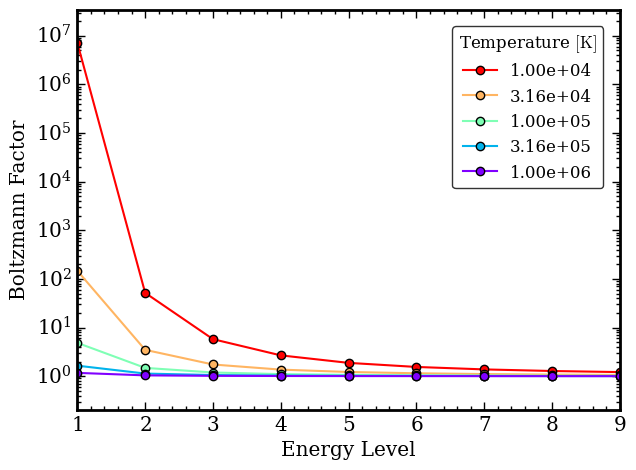

In [4]:
handles = []
labels = []
fig, ax = plot.figax(
    xlabel=plot.LABEL_LEVEL, ylabel=plot.LABEL_BFACT,
    xscale='linear')

temps = np.logspace(4,6,5)
colors = cm.rainbow_r(np.linspace(0,1,len(temps)))
for ii, temp in enumerate(temps):
    hbf = lte.Boltzmann_Factor(temp=temp, atom=hydrogen,)
    bfact = hbf.bfact
    hh = hbf.draw_bfact(ax, color=colors[ii])
    handles.append(hh)
    labels.append(f"{temp:.2e}")
    print(labels)

ax.legend(handles=handles, labels=labels, title=plot.LABEL_TEMP)
